In [10]:
from PIL import PcfFontFile

In [11]:
with open("ProFont_r400-29.pcf", "rb") as f:
    font = PcfFontFile.PcfFontFile(f)

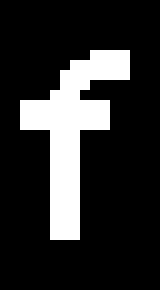

In [12]:
img = font.glyph[ord('f')][3]
img.resize((img.width*10, img.height*10))

In [13]:
img.width, img.height

(16, 29)

In [14]:
def bytes_for_char(c):
    img = font.glyph[c][3]
    result = []
    for x in range(img.width):
        byte = 0
        i = 0
        for y in range(img.height):
            bit = int(img.getpixel((x,y)) != 0)
            byte |= bit << i
            i += 1
            if i == 8:
                result.append(byte)
                byte=0
                i = 0
        if i != 0:
            result.append(byte)
    return result
result = bytes_for_char(ord('f'))

In [15]:
stride = 4
for i in range(0, len(result), stride):
    for byte in [result[j] for j in range(i, i+stride)]:
        for j in range(8):
            print('#' if bool(byte & 1 << j) else '.', end='')
    print()

................................
................................
..........###...................
..........###...................
..........###...................
.........###############........
.......#################........
......##################........
......###.###...................
.....###..###...................
.....###..###...................
.....###........................
.....###........................
................................
................................
................................


In [16]:
numbers_only = True
if numbers_only:
    chars = [bytes_for_char(c) for c in range(48, 58)]
else:
    chars = [bytes_for_char(c) for c in range(32, 128)]
chars = [byte for char in chars for byte in char]

In [17]:
len(bytes(chars))

640

In [19]:
with open('font.raw', 'wb+') as f:
    f.write(bytes(chars))

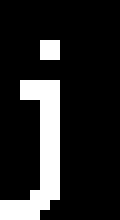

In [12]:
img = font.glyph[ord('j')][3]
img.resize((img.width*10, img.height*10))

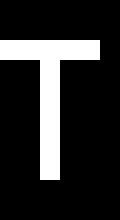

In [13]:
img = font.glyph[ord('T')][3]
img.resize((img.width*10, img.height*10))

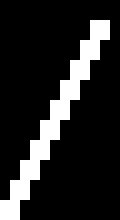

In [14]:
img = font.glyph[ord('/')][3]
img.resize((img.width*10, img.height*10))